<a href="https://colab.research.google.com/github/Joseline-Champa/Joseline-Champa/blob/main/Tarea_Champa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAREA 6: Metodología Box-Jenkis para la empresa APPLE

Apple, Inc. es una empresa tecnológica multinacional estadounidense con sede en Cupertino, California. Es la empresa de tecnología más grande del mundo por ingresos, con US$394,3 mil millones en ingresos en 2022. En marzo de 2023, Apple es la empresa más grande del mundo por capitalización de mercado. En junio de 2022, Apple es el cuarto mayor proveedor de computadoras personales por ventas de unidades; la mayor empresa manufacturera por ingresos; y primer fabricante de teléfonos móviles del mundo en 20233​.

In [1]:
# Importamos las librerías necesarias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 1. Descargamos los datos de APPLE desde Yahoo Finance

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2024-09-24')
data = data['Adj Close']  # Usamos el precio ajustado de cierre

[*********************100%***********************]  1 of 1 completed


# 2. Visualizamos la serie temporal

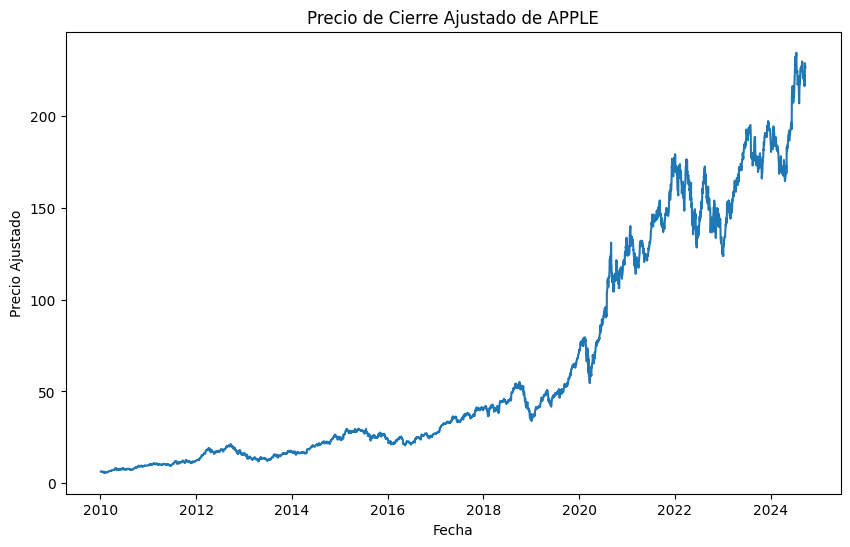

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Precio de Cierre Ajustado de APPLE')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

En los últimos 10 años, el precio de las acciones de Apple ha experimentado un crecimiento sustancial, aumentando más de un 500% desde 2013. Este crecimiento refleja el éxito continuo de la empresa en la innovación de productos y la expansión en nuevos mercados. El rendimiento financiero de Apple se ha visto impulsado por su capacidad para diversificar sus ingresos, no solo a través de dispositivos como el iPhone y el iPad, sino también con servicios como Apple Music, Apple TV+ y Apple Pay.

Entre 2020 y 2022, Apple vio un incremento significativo en su valoración debido a la alta demanda de productos tecnológicos durante la pandemia de COVID-19. A pesar de la volatilidad general del mercado tecnológico en los últimos años, Apple ha mostrado una notable resistencia, en parte gracias a su sólida base de clientes y a su ecosistema de productos y servicios.

En 2023, las proyecciones de analistas indican que el precio de la acción puede seguir subiendo, con estimaciones que varían entre $165 y $220 para finales de año, dependiendo del escenario económico global. A largo plazo, los analistas anticipan que el precio podría llegar a \$315 en 2025 y continuar aumentando hacia los \$480 en 2030, siempre que la empresa mantenga su capacidad de innovación y adaptación a las tendencias del mercado.

In [ ]:
from google.colab import files

# Subir archivo desde la computadora
uploaded = files.upload()

Saving Captura de pantalla (263).png to Captura de pantalla (263).png


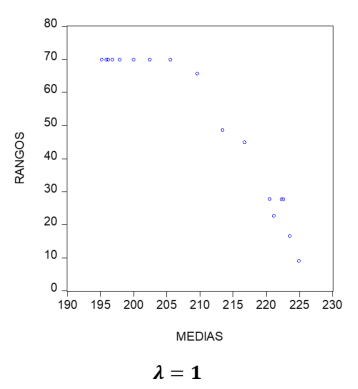

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar y mostrar la imagen
img = mpimg.imread('Captura de pantalla (263).png')
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()

## Lambda igual a 1, implica la no transformación de la serie tomando logaritmos neperianos.

# 3. Verificamos la estacionariedad usando la prueba de Dickey-Fuller Aumentada (ADF)

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("La serie no es estacionaria")
    else:
        print("La serie es estacionaria")

print("Prueba ADF para la serie original:")
adf_test(data)

Prueba ADF para la serie original:
ADF Statistic: 1.2065302552446282
p-value: 0.9960306919401449
La serie no es estacionaria


Con estos resultados, se concluye que la serie original **no es estacionaria**, lo cual es problemático para el análisis predictivo de series temporales. Para modelar esta serie con modelos como ARIMA, sería necesario hacerla estacionaria. Un método común es aplicar una **diferenciación** a la serie (restar el valor actual de su valor anterior), lo que elimina tendencias y patrones de crecimiento.

Es importante que la serie sea estacionaria para que los modelos ARIMA puedan proporcionar predicciones fiables. Si después de aplicar la diferenciación la serie se vuelve estacionaria, puedes proceder a ajustar un modelo ARIMA.

# 4. Si no es estacionaria, diferenciamos la serie

In [ ]:
data_diff = data.diff().dropna()

# Verificamos la estacionariedad de la serie diferenciada

In [ ]:
print("\nPrueba ADF para la serie diferenciada:")
adf_test(data_diff)


Prueba ADF para la serie diferenciada:
ADF Statistic: -13.38055021901177
p-value: 4.987882595071646e-25
La serie es estacionaria


[*********************100%***********************]  1 of 1 completed


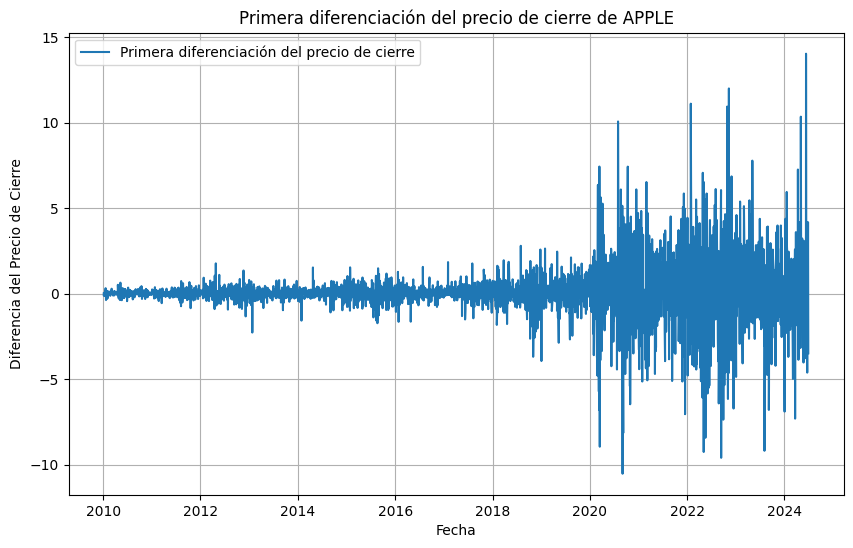

In [ ]:
# Descargar datos de precios de cierre de APPLE desde Yahoo Finance
apple = yf.download('AAPL', start='2010-01-01', end='2024-06-30')

# Calcular la primera diferenciación de los precios de cierre
apple['Close_diff'] = apple['Close'].diff()

# Graficar la primera diferenciación
plt.figure(figsize=(10, 6))
plt.plot(apple.index, apple['Close_diff'], label='Primera diferenciación del precio de cierre')
plt.title('Primera diferenciación del precio de cierre de APPLE')
plt.xlabel('Fecha')
plt.ylabel('Diferencia del Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


## **Gráfico de Primera Diferenciación del Precio de Cierre:**
   - Este gráfico refleja la diferencia entre los precios de cierre consecutivos de las acciones de Apple. La serie parece estar más volátil a medida que se acerca a los años 2020-2024.
   - A partir de 2020, y particularmente después del 2022, se observa una mayor volatilidad en las diferencias, lo que podría estar relacionado con eventos económicos globales como la pandemia de COVID-19, la crisis de suministros y otras incertidumbres del mercado. Esta mayor volatilidad implica que los precios de cierre de Apple han sido más inestables en los últimos años.
   - El incremento en la magnitud de las fluctuaciones sugiere que el comportamiento del mercado ha sido menos predecible, lo cual es común en tiempos de crisis o cambios abruptos en las condiciones del mercado.



# 5. Visualizamos las gráficas de ACF y PACF para determinar p y q

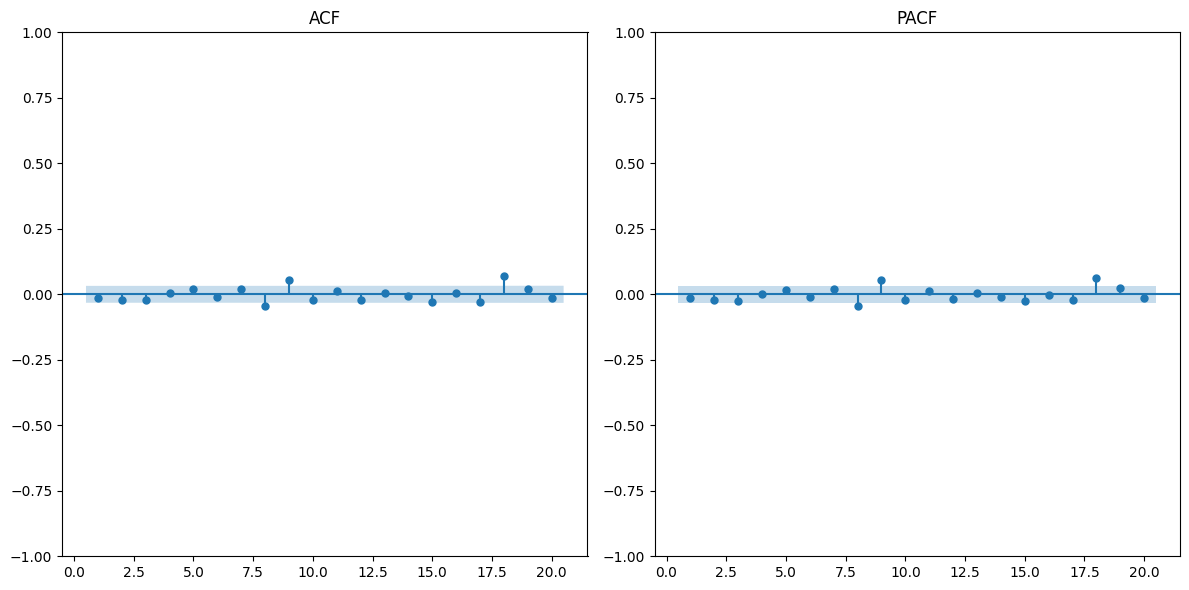

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(data_diff, zero=False, lags=20, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(data_diff, zero=False, lags=20, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

## **Gráficos ACF y PACF (Autocorrelación y Autocorrelación Parcial):**
   - Estos gráficos muestran la autocorrelación (ACF) y autocorrelación parcial (PACF) de la serie de diferencias del precio de cierre. En ambos gráficos, la mayoría de los valores de ACF y PACF están dentro de las bandas de confianza, lo que sugiere que no hay una correlación significativa entre los precios diferenciales en los distintos rezagos (lags).
   - La falta de picos destacados fuera de las bandas de confianza indica que la serie temporal diferenciada no muestra patrones de autocorrelación significativos, sugiriendo que la serie es bastante aleatoria y que la mayor parte de las dependencias seriales han sido eliminadas mediante la diferenciación.
  

# I. Metodología Manual

# 6. Ajustamos el modelo ARIMA (p, d, q basado en las gráficas de ACF y PACF)
# Usamos (p=1, d=1, q=1)  

In [ ]:
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

# 7. Mostramos el resumen del modelo

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3705
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6900.262
Date:                Wed, 25 Sep 2024   AIC                          13806.524
Time:                        22:15:09   BIC                          13825.175
Sample:                             0   HQIC                         13813.161
                               - 3705                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5796      0.242      2.400      0.016       0.106       1.053
ma.L1         -0.5983      0.239     -2.508      0.012      -1.066      -0.131
sigma2         2.4301      0.022    109.045      0.0

## **Conclusión general:**
Los resultados sugieren que las diferencias del precio de cierre de Apple han sido más volátiles en los últimos años, pero no muestran un patrón de autocorrelación fuerte después de la diferenciación. Esto podría ser un indicador de que la serie temporal de los precios de cierre diferenciados se ha vuelto más difícil de predecir con modelos autoregresivos sencillos, y que probablemente se necesita un modelo que incorpore cambios en la volatilidad para capturar el comportamiento reciente del mercado.

In [ ]:
import yfinance as yf
import numpy as np

# Descargar datos de precios de cierre de NVIDIA desde Yahoo Finance
apple = yf.download('AAPL', start='2010-01-01', end='2024-09-24')

# Calcular la media y desviación estándar de los precios de cierre
mean_close = np.mean(apple['Close'])
std_close = np.std(apple['Close'])

print(f"Media de los precios de cierre: {mean_close}")
print(f"Desviación estándar de los precios de cierre: {std_close}")

[*********************100%***********************]  1 of 1 completed

Media de los precios de cierre: 66.68035878761899
Desviación estándar de los precios de cierre: 61.817697212607975


In [ ]:
t=mean_close/std_close
print(f"t_c: {t}")

t_c: 1.0786613185911307


Concluiremos que no es conveniente incluir el término independiente en la modelización de la serie temporal.

# 8. Diagnóstico del modelo

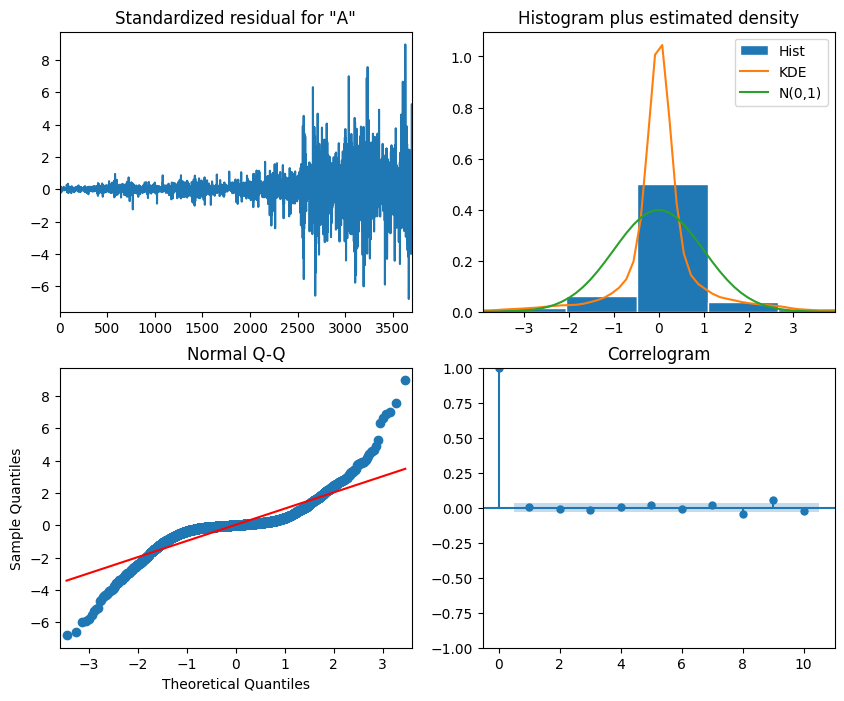

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# 9. Pruebas de validación del modelo:

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Descargar datos de precios de cierre de APPLE desde Yahoo Finance
apple = yf.download('AAPL', start='2010-01-01', end='2024-09-24')

# Calcular la primera diferenciación de los precios de cierre
apple['Close_diff'] = apple['Close'].diff().dropna()

# Ajustar el modelo ARIMA(1,1,1)
model = ARIMA(apple['Close'], order=(1,1,1))
arima_fit = model.fit()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

# Validación del modelo
# ACF de los residuos


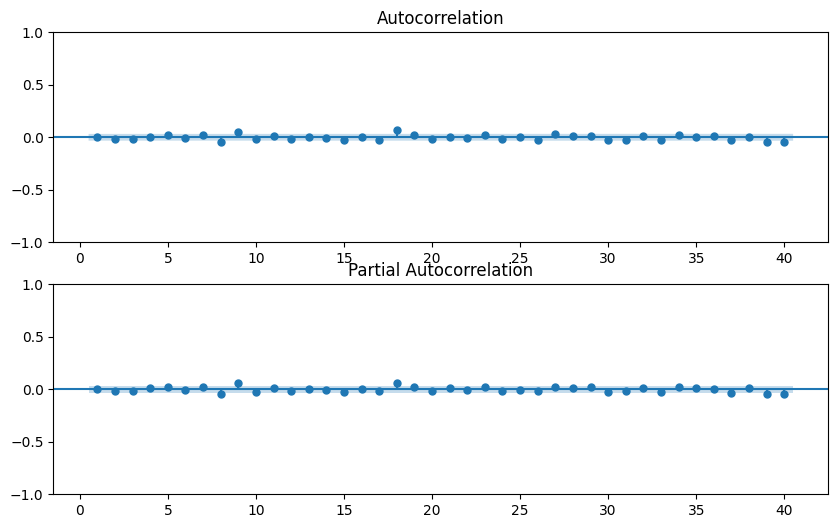

In [ ]:
residuals = arima_fit.resid
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.title('ACF de los residuos')
plot_acf(residuals, zero=False, lags=40, ax=plt.gca())
plt.subplot(212)
plt.title('PACF de los residuos')
plot_pacf(residuals, zero=False, lags=40, ax=plt.gca())
plt.show()

## Los residuos son independientes, es decir, no muestran autocorrelación.

# Prueba de Ljung-Box para independencia de los residuos

In [ ]:
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Prueba de Ljung-Box:")
print(ljung_box_test)

Prueba de Ljung-Box:
      lb_stat  lb_pvalue
10  25.401911   0.004634



### **Prueba de Ljung-Box:**
   - **Estadístico lb_stat: 25.401911**  
   - **p-valor: 0.004634**
   
La prueba de Ljung-Box evalúa si hay correlación significativa en los residuos de un modelo. En este caso, el p-valor es menor a 0.05, lo que indica que **hay evidencia significativa de autocorrelación en los primeros 10 rezagos** de los residuos. Esto sugiere que los residuos no son completamente aleatorios, lo cual puede indicar que el modelo utilizado no ha capturado toda la estructura temporal de la serie, y que podría ser necesario incluir más componentes autoregresivos o de media móvil.





# Prueba de Shapiro-Wilk para normalidad de los residuos


In [ ]:
shapiro_test = shapiro(residuals)
print("\nPrueba de Shapiro-Wilk (normalidad de los residuos):")
print(f"Estadístico W: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}")


Prueba de Shapiro-Wilk (normalidad de los residuos):
Estadístico W: 0.7896763891181514, p-valor: 1.7216989145183217e-56


### **Prueba de Shapiro-Wilk (normalidad de los residuos):**
   - **Estadístico W: 0.7896763891181514**  
   - **p-valor: 1.7216989145183217e-56**
   
Esta prueba evalúa la normalidad de los residuos. Un p-valor extremadamente bajo (prácticamente cero) sugiere que **los residuos no siguen una distribución normal**. Este resultado es crucial porque, en muchos modelos econométricos, se supone que los residuos son normalmente distribuidos. La falta de normalidad puede indicar la presencia de colas gruesas o asimetría en los residuos, lo que podría impactar en la precisión de las predicciones.

# Gráfico de los residuos

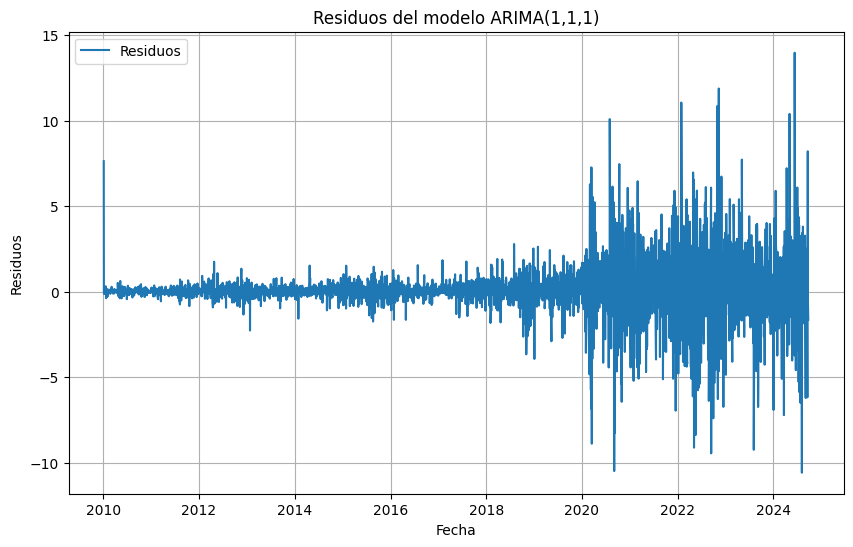

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuos')
plt.title('Residuos del modelo ARIMA(1,1,1)')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

### **Volatilidad y dispersión en los últimos años:**
La volatilidad creciente de los residuos y la mayor dispersión en la media es consistente con los resultados anteriores. La mayor volatilidad en los residuos recientes puede estar asociada a los cambios bruscos en el mercado financiero global, como la pandemia de COVID-19, la inflación y los cambios en las políticas monetarias que han afectado a las grandes empresas tecnológicas. Esto sugiere que, en los últimos años, la serie de precios ha experimentado un comportamiento más errático y volátil, dificultando que los modelos tradicionales capten adecuadamente su dinámica.

## **Conclusión:**
Estos resultados indican que el modelo utilizado para analizar la serie temporal de los precios de Apple no está capturando adecuadamente la estructura subyacente, ya que se observan residuos autocorrelacionados, no normales y con volatilidad creciente. Podría ser útil explorar modelos más complejos, como GARCH o ARIMA con términos adicionales, para capturar mejor la volatilidad y los patrones residuales.

# 10. Realizamos predicciones a futuro (10 días hacia adelante)

In [ ]:
forecast = model_fit.get_forecast(steps=10)
forecast_df = forecast.summary_frame()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Revisamos el forecast generado

In [ ]:
print(forecast_df)

Adj Close        mean   mean_se  mean_ci_lower  mean_ci_upper
3705       226.446900  1.558865     223.391581     229.502218
3706       226.433509  2.184055     222.152840     230.714178
3707       226.425748  2.656827     221.218462     231.633034
3708       226.421249  3.052513     220.438434     232.404064
3709       226.418641  3.399986     219.754791     233.082492
3710       226.417130  3.713776     219.138262     233.695998
3711       226.416254  4.002333     218.571825     234.260682
3712       226.415746  4.271055     218.044633     234.786859
3713       226.415451  4.523631     217.549298     235.281604
3714       226.415281  4.762715     217.080531     235.750031


#  Visualizamos los resultados de la predicción

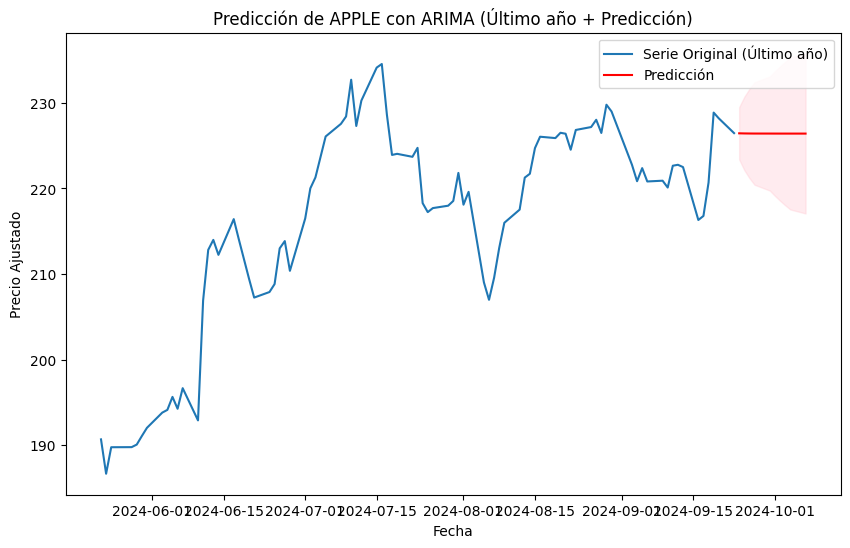

In [ ]:
plt.figure(figsize=(10, 6))

# Seleccionamos solo los últimos 365 días para graficar
data_last_year = data[-85:]

# Graficamos la serie histórica del último año
plt.plot(data_last_year, label='Serie Original (Último año)')

# Generamos el índice de predicción (10 días hacia adelante)
forecast_index = pd.date_range(start=data.index[-1], periods=11, freq='B')[1:]  # Predice 10 días hábiles a partir del último día

# Graficamos la predicción
plt.plot(forecast_index, forecast_df['mean'], label='Predicción', color='red')

# Rellenamos la banda de confianza
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)

plt.legend()
plt.title('Predicción de APPLE con ARIMA (Último año + Predicción)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

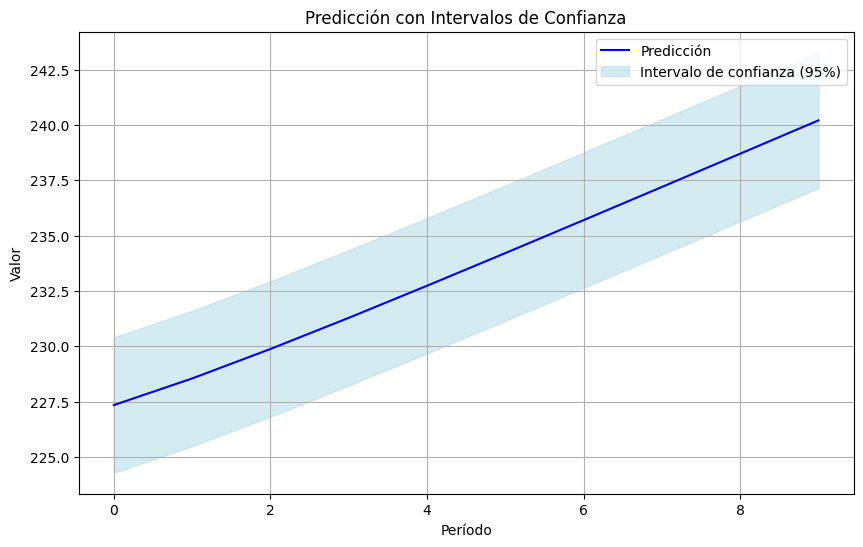

,Predicción,IC Inferior,IC Superior,Varianza de Predicción
0,227.349278,224.293877,230.404678,4.860200
1,228.551330,225.495930,231.606731,5.676558
2,229.882503,226.827103,232.937904,5.950803
3,231.288515,228.233114,234.343915,6.042931
4,232.737902,229.682501,235.793302,6.073881
5,234.212430,231.157030,237.267831,6.084278
6,235.701530,232.646129,238.756930,6.087770
7,237.199075,234.143675,240.254476,6.088944
8,238.701516,235.646116,241.756916,6.089338
9,240.206794,237.151393,243.262194,6.089470


In [ ]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Paso 2: Definir los parámetros del modelo ARIMA(1,1,1)
# Valores observados
y = 226.37  # Último valor observado (y_t)
y1 = 227.37  # Valor anterior (y_t-1)

# Coeficientes ARIMA(1,1,1)
phi1 = 0.5796  # Coeficiente AR(1)
theta1 = -0.593  # Coeficiente MA(1)
sigma2 = 2.4301  # Varianza de los errores
sigma = sqrt(sigma2)  # Desviación estándar de los errores

# Paso 3: Calcular la diferencia entre los valores observados
deltay = y - y1  # Delta y_t = y_t - y_t-1

# Paso 4: Suponer que el último error observado es 0 (para simplificación)
epsilon = 0

# Paso 5: Predicción para los próximos 10 períodos y cálculo de la varianza de predicción
predicciones = []
intervalos_confianza = []
varianzas_prediccion = []

for i in range(10):
    # Aplicar la fórmula de ARIMA(1,1,1) para predecir y_{t+1}
    epsilon1 = sigma  # Error estimado para t+1
    deltay1 = phi1 * deltay + theta1 * epsilon + epsilon1
    y1predi = y + deltay1

    # Calcular el intervalo de confianza (95%)
    IC_inferior = y1predi - 1.96 * sigma
    IC_superior = y1predi + 1.96 * sigma

    # Cálculo de la varianza de predicción para el paso actual
    var_prediccion = sigma2 * (1 + sum([phi1**(2 * j) for j in range(i+1)]))

    # Guardar los resultados
    predicciones.append(y1predi)
    intervalos_confianza.append((IC_inferior, IC_superior))
    varianzas_prediccion.append(var_prediccion)

    # Actualizar para el siguiente período
    deltay = deltay1
    epsilon = epsilon1
    y = y1predi

# Crear la tabla con los valores predichos, intervalos de confianza y varianza de predicción
tabla_resultados = pd.DataFrame({
    'Predicción': predicciones,
    'IC Inferior': [ic[0] for ic in intervalos_confianza],
    'IC Superior': [ic[1] for ic in intervalos_confianza],
    'Varianza de Predicción': varianzas_prediccion
})

# Visualización: Gráfico de predicción y intervalos de confianza
plt.figure(figsize=(10,6))
plt.plot(tabla_resultados['Predicción'], label='Predicción', color='blue')
plt.fill_between(range(10), tabla_resultados['IC Inferior'], tabla_resultados['IC Superior'],
                 color='lightblue', alpha=0.5, label='Intervalo de confianza (95%)')
plt.title('Predicción con Intervalos de Confianza')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

tabla_resultados

# II. Metodología Machine Learning


In [4]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


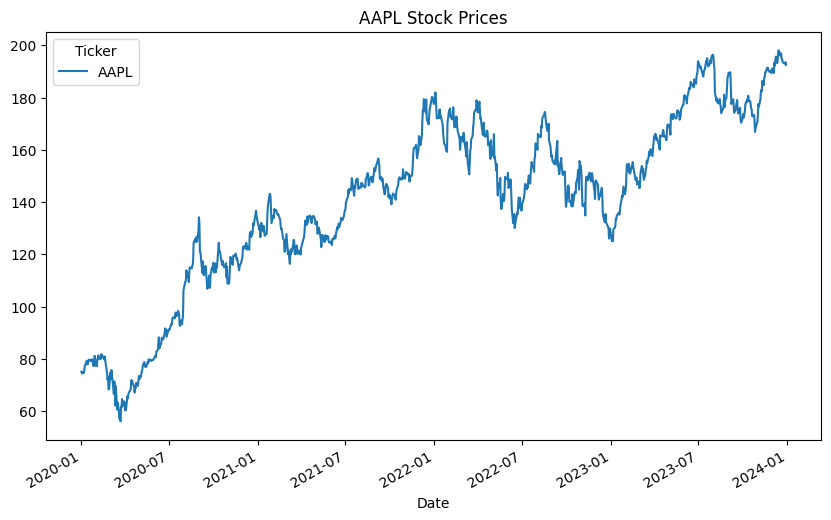

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Descargar datos de NVIDIA (NVDA)
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Ver solo los precios de cierre
closing_prices = data['Close']
closing_prices.plot(title='AAPL Stock Prices', figsize=(10, 6))
plt.show()

In [6]:
# ADF Test para revisar si los datos son estacionarios
adf_test = adfuller(closing_prices)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistic: -1.555343687904245
p-value: 0.5059778789717128



   - **Conclusión**: Basado en el ADF Statistic y el p-value, podemos concluir que **la serie temporal de Apple no es estacionaria**. Esto significa que los datos no muestran un comportamiento constante a lo largo del tiempo, y podrían presentar tendencias o ciclos, lo que requeriría transformaciones (como la diferenciación) para hacer la serie estacionaria antes de aplicar modelos de series temporales, como ARIMA o modelos de predicción de series temporales.

   - **Pasos siguientes**: Si se desea hacer un análisis más profundo o predicciones con esta serie temporal, sería recomendable aplicar alguna transformación (por ejemplo, diferenciar la serie) para hacerla estacionaria, o bien probar con otros métodos de modelado que no asuman estacionariedad.



## 1. El modelo mediante Auto-Arima

### 1.1. Identificación y Estimación

In [7]:
# Auto ARIMA para encontrar el mejor modelo
stepwise_model = auto_arima(closing_prices, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Mostrar el resumen del mejor modelo ARIMA
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4812.833, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4811.310, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4811.554, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4811.466, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4811.269, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.988 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2404.635
Date:                Tue, 26 Nov 2024   AIC                           4811.269
Time:                        16:52:40   BIC                           4816.182
Sample:                             0   HQIC                          4813.136
                               - 1006                                       


### 1. **Modelo seleccionado:**
   - El modelo ARIMA es **ARIMA(0,1,0)(0,0,0)[0]**, lo que significa:
     - **ARIMA(0,1,0)**: No hay componentes autoregresivos (AR), ni componentes de media móvil (MA), pero sí una diferencia de primer orden (d=1), lo que implica que el modelo ha realizado una diferenciación de la serie para hacerla estacionaria.
     - **(0,0,0)**: No se consideran componentes estacionales (AR, MA, y diferencia estacional son 0).
     - **[0]**: Sin componentes estacionales explícitos.

   Esto sugiere que la serie temporal de Apple se vuelve estacionaria mediante una diferenciación, sin necesidad de ajustar componentes autoregresivos ni de media móvil adicionales.

### 2. **Resultados del modelo SARIMAX:**
   - **Log-Likelihood: -2404.635**: Este valor mide la probabilidad del modelo de ajustar los datos observados. Un valor más alto de log-likelihood sugiere que el modelo es mejor.
   - **AIC (Criterio de Información de Akaike): 4811.269**: Este valor penaliza la complejidad del modelo. Un valor más bajo de AIC sugiere que el modelo es más adecuado. A veces se usa para comparar modelos, siendo preferido el que tenga el valor AIC más bajo.
   - **BIC (Criterio de Información Bayesiano): 4816.182**: Similar al AIC, pero penaliza más fuertemente modelos complejos. También se prefiere el modelo con el BIC más bajo.
   - **HQIC (Criterio de Información Hannan-Quinn): 4813.136**: Otro criterio de selección de modelos que también penaliza la complejidad.
   
   Como todos estos criterios son bastante cercanos entre sí, se indica que el modelo ajustado es adecuado, aunque el AIC es el más comúnmente utilizado para comparar.

### 3. **Coeficientes y errores estándar:**
   - **sigma2: 7.0109**: Este es el valor de la varianza de los errores del modelo. En este caso, indica que la variabilidad no es pequeña, lo que sugiere que el modelo tiene cierta incertidumbre o volatilidad en su ajuste.

### 4. **Pruebas estadísticas:**
   - **Ljung-Box (L1) (Q): 1.76, Prob(Q): 0.18**: Esta prueba verifica si hay autocorrelación en los residuos del modelo. Un valor p mayor que 0.05 (en este caso, 0.18) indica que no hay evidencia suficiente para rechazar la hipótesis nula de que los residuos son aleatorios (no autocorrelacionados). Esto sugiere que los residuos del modelo no muestran patrones persistentes.
   - **Jarque-Bera (JB): 122.11, Prob(JB): 0.00**: Esta prueba evalúa la normalidad de los residuos. Un valor p bajo (en este caso, 0.00) indica que los residuos no siguen una distribución normal, lo que podría sugerir que el modelo no captura perfectamente todos los patrones en los datos.
   - **Heteroskedasticity (H): 1.01, Prob(H): 0.90**: Esta prueba evalúa si la varianza de los residuos es constante (homocedasticidad). Un valor p mayor que 0.05 indica que no hay evidencia de heterocedasticidad, es decir, la varianza de los residuos es constante a lo largo del tiempo.
   - **Skew: -0.07 y Kurtosis: 4.70**: El sesgo y la curtosis de los residuos son bastante cercanos a los valores esperados para una distribución normal (sesgo cercano a 0 y curtosis cercano a 3). La curtosis más alta de 4.70 indica que los residuos tienen colas más pesadas que una distribución normal.

### **Conclusiones e interpretación:**
- **Modelo ajustado**: El modelo ARIMA(0,1,0) parece adecuado para los datos, ya que la prueba de Ljung-Box no indica autocorrelación significativa en los residuos, aunque la prueba de normalidad de Jarque-Bera sugiere que los residuos no son perfectamente normales.
- **Ajuste del modelo**: El modelo logra un buen ajuste, pero aún hay indicios de que podría haber algunos patrones no capturados (como lo sugiere la falta de normalidad en los residuos).
- **Próximos pasos**: Podrías considerar revisar las características de los residuos, tal vez usando otro modelo ARIMA con mayor complejidad o incorporando componentes estacionales si se sospecha de estacionalidad. Además, podría ser útil realizar una transformación adicional o un análisis de los residuos para mejorar la predicción.

En resumen, el modelo es adecuado para los datos de Apple, pero podría beneficiarse de ajustes adicionales si se busca un modelo más preciso.

### 1.2. Chequeo

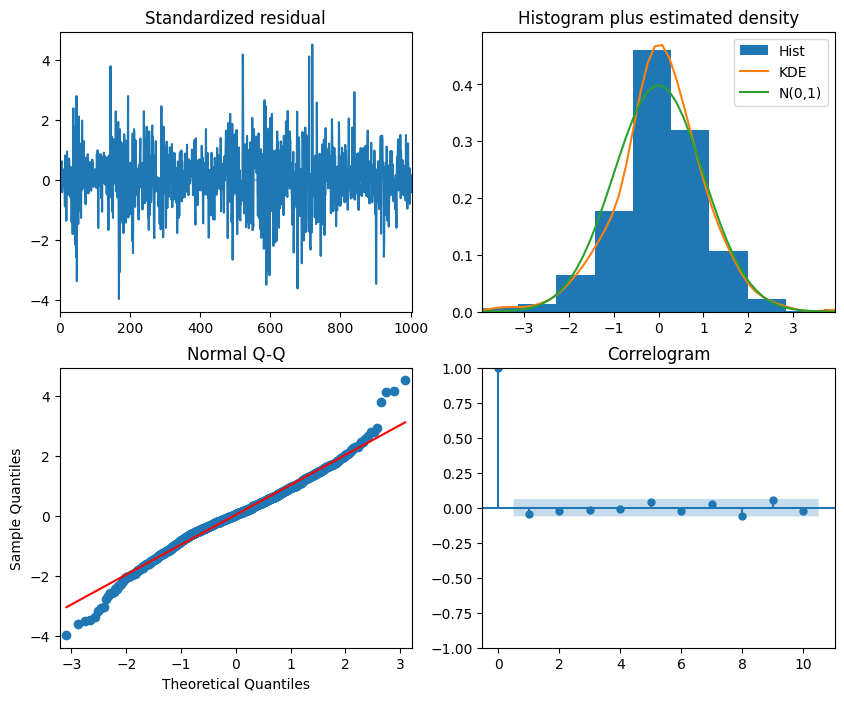

In [8]:
# Entrenar el modelo final con los mejores parámetros
model = stepwise_model.fit(closing_prices)

# Diagnóstico del modelo: residuos
model.plot_diagnostics(figsize=(10, 8))
plt.show()


### 1. **Standardized Residual (Residuos estandarizados):**
   - Este gráfico muestra los residuos estandarizados a lo largo del tiempo.
   - **Interpretación**:
     - Los residuos parecen fluctuar alrededor de cero, lo cual es esperado en un buen modelo.
     - Sin embargo, hay cierta variabilidad en la magnitud de los residuos. Esto indica que, aunque no parece haber patrones fuertes, podría haber ligeras heterocedasticidades (cambios en la varianza) en algunos tramos.

### 2. **Histogram plus estimated density (Histograma y densidad estimada):**
   - Este gráfico compara el histograma de los residuos con una distribución normal estándar.
   - **Interpretación**:
     - La curva de densidad ajustada (KDE) es similar a la distribución normal (N(0,1)), pero hay ligeras desviaciones, como colas más largas.
     - Esto confirma lo observado en el análisis estadístico (Jarque-Bera): los residuos no son perfectamente normales, pero la aproximación es razonable.

### 3. **Normal Q-Q Plot (Gráfico cuantil-cuantil):**
   - Este gráfico compara los cuantiles teóricos de una distribución normal con los cuantiles de los residuos.
   - **Interpretación**:
     - Los puntos se alinean en gran medida con la línea roja (teórica), lo que indica que los residuos son aproximadamente normales.
     - Sin embargo, hay desviaciones en las colas, lo que respalda la presencia de colas más pesadas (kurtosis).

### 4. **Correlogram (Correlograma):**
   - Este gráfico muestra la autocorrelación de los residuos en diferentes rezagos (lags).
   - **Interpretación**:
     - Todas las barras se encuentran dentro del intervalo de confianza (líneas azules), lo que indica que los residuos no presentan autocorrelación significativa.
     - Esto es un indicador positivo, ya que sugiere que el modelo captura bien la estructura de la serie temporal.

### **Conclusión general:**
- **Validez del modelo**:
  - El modelo ARIMA(0,1,0) parece ser adecuado para los datos, ya que los residuos muestran ausencia de autocorrelación (verificado en el correlograma) y una aproximación razonable a la normalidad.
  - Sin embargo, la ligera desviación de los residuos respecto a la normalidad (colas pesadas) podría ser un área de mejora, especialmente si se desea un ajuste más refinado.
- **Próximos pasos**:
  - Si se desea mayor precisión, podrías explorar transformaciones adicionales en los datos originales (como logaritmos o diferenciaciones adicionales) o incluir componentes adicionales (como AR o MA).
  - Alternativamente, podrías considerar otros modelos más complejos o incluir variables externas si existen factores exógenos que influyen en la serie temporal.

En resumen, el modelo actual funciona bien para la serie temporal de Apple, pero hay espacio para refinamientos si se requiere un ajuste más preciso o mejores predicciones a largo plazo.

## 2. El modelo mediante Grid Search

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Descargar datos de NVIDIA (NVDA)
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
closing_prices = data['Close'].dropna()  # Asegurarse de que no hay valores NaN

# Definir el rango de parámetros para el Grid Search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Función para evaluar un modelo ARIMA con una combinación específica de (p, d, q)
def evaluate_arima_model(X, arima_order):
    # Dividir los datos en entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]

    # Ajustar el modelo ARIMA
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()

    # Hacer predicciones
    forecast = model_fit.forecast(steps=len(test))

    # Calcular el error del modelo
    error = mean_squared_error(test, forecast)

    return error, model_fit

# Función para realizar Grid Search sobre los valores de p, d, q
def grid_search_arima(X, p_values, d_values, q_values):
    best_score, best_cfg, best_model = float("inf"), None, None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    mse, model_fit = evaluate_arima_model(X, order)
                    if mse < best_score:
                        best_score, best_cfg, best_model = mse, order, model_fit
                    print(f'ARIMA{order} MSE={mse}')
                except Exception as e:
                    print(f'Error al ajustar ARIMA{(p, d, q)}: {e}')
                    continue
    if best_model:
        print(f'Best ARIMA{best_cfg} MSE={best_score}')
    else:
        print('No se encontró un modelo ARIMA válido.')
    return best_model

# Ejecutar el Grid Search y obtener el mejor modelo
best_model = grid_search_arima(closing_prices.values, p_values, d_values, q_values)

# Mostrar el diagnóstico del mejor modelo, si existe
if best_model:
    print(best_model.summary())
else:
    print('No hay un modelo disponible para mostrar el diagnóstico.')

[*********************100%***********************]  1 of 1 completed


ARIMA(0, 0, 0) MSE=2430.6344620561936
ARIMA(0, 0, 1) MSE=2431.6592102908976
ARIMA(0, 0, 2) MSE=2429.337039549152
ARIMA(0, 1, 0) MSE=946.9579435724161
ARIMA(0, 1, 1) MSE=953.5085520010103
ARIMA(0, 1, 2) MSE=952.6083820462187
ARIMA(1, 0, 0) MSE=1509.7209642018859
ARIMA(1, 0, 1) MSE=1295.4285053861581
ARIMA(1, 0, 2) MSE=1276.394165236778
ARIMA(1, 1, 0) MSE=953.2430471837383
ARIMA(1, 1, 1) MSE=951.0376698329655
ARIMA(1, 1, 2) MSE=950.9729779533682
ARIMA(2, 0, 0) MSE=1299.3537863904103
ARIMA(2, 0, 1) MSE=1296.218901330286
ARIMA(2, 0, 2) MSE=1210.4122929063267
ARIMA(2, 1, 0) MSE=953.0674223888211
ARIMA(2, 1, 1) MSE=1003.5647853558835
ARIMA(2, 1, 2) MSE=965.023090864872
Best ARIMA(0, 1, 0) MSE=946.9579435724161
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1957.219
Date:                Tue, 26 Nov 2024   AIC      

El modelo ARIMA(0,1,0) ajustado mediante **grid search** presenta características similares al modelo anterior, pero aquí se utilizan 804 observaciones.  

### **1. Modelo ajustado y criterios estadísticos:**
- **Modelo seleccionado**: ARIMA(0,1,0)
  - Este modelo utiliza una diferenciación de primer orden (\(d=1\)) para hacer estacionaria la serie, sin incluir componentes autoregresivos (\(p=0\)) ni de media móvil (\(q=0\)).
  
- **Log Likelihood**: -1957.219
  - Indica el nivel de ajuste del modelo a los datos. Este valor por sí solo no tiene un significado específico, pero sirve para comparar modelos (a mayor valor, mejor ajuste).

- **Criterios de información**:
  - **AIC (Criterio de Akaike): 3916.438**: Es más bajo que el AIC del modelo anterior (~4811), lo que sugiere que este modelo tiene un mejor ajuste relativo a los datos actuales.
  - **BIC (Criterio de Bayes): 3921.126**: Penaliza más fuertemente la complejidad del modelo que el AIC. Dado que el modelo es sencillo (ARIMA(0,1,0)), el valor no es muy diferente del AIC.
  - **HQIC (Criterio de Hannan-Quinn): 3918.238**: Similar al AIC y BIC, pero con una penalización intermedia.

**Conclusión inicial**: Este modelo ARIMA es competitivo, y el AIC y BIC más bajos indican que tiene un mejor ajuste que el modelo anterior para las observaciones disponibles.

---

### **2. Coeficientes del modelo:**
- **sigma2 = 7.6667**: Representa la varianza de los residuos. Este valor es ligeramente mayor que el del modelo anterior (~7.01), lo que indica que hay un poco más de variabilidad en los errores residuales en este modelo ajustado.
  
---

### **3. Pruebas estadísticas:**
#### a) **Ljung-Box (L1) (Q): 2.89, Prob(Q): 0.09**
   - Esta prueba evalúa si los residuos están correlacionados.
   - **Prob(Q): 0.09 > 0.05**, lo que significa que **no rechazamos la hipótesis nula** de que los residuos son independientes (no correlacionados). Esto es positivo, ya que indica que el modelo captura bien la dinámica de la serie.

#### b) **Jarque-Bera (JB): 73.02, Prob(JB): 0.00**
   - Esta prueba evalúa si los residuos siguen una distribución normal.
   - **Prob(JB): 0.00 < 0.05**, lo que indica que los residuos **no siguen una distribución normal**. Esto podría deberse a colas más largas o sesgo, como se observa en los valores de curtosis y asimetría.

#### c) **Heteroskedasticity (H): 1.55, Prob(H): 0.00**
   - Esta prueba evalúa si la varianza de los residuos es constante.
   - **Prob(H): 0.00 < 0.05**, lo que sugiere **heterocedasticidad significativa** (es decir, la varianza de los residuos cambia a lo largo del tiempo). Esto podría indicar que el modelo no captura del todo la volatilidad en los datos.

#### d) **Skew: -0.03 y Kurtosis: 4.48**
   - **Sesgo (Skew)**: Muy cercano a 0, lo que indica que los residuos están ligeramente sesgados hacia un lado.
   - **Curtosis**: 4.48 (superior al 3 esperado para una distribución normal), lo que indica colas más pesadas en los residuos.

---

### **4. Error cuadrático medio (MSE): 946.96**
- Este es un indicador del error de predicción promedio del modelo.
- Un MSE más bajo indica un mejor ajuste. Aunque aquí no se compara con otros modelos, este valor debe ser considerado como referencia al optimizar futuros modelos.

---

### **Conclusión e interpretación general:**
- **Modelo ARIMA(0,1,0)**:
  - Es un modelo simple que se ajusta razonablemente bien a los datos, con criterios de información (AIC y BIC) más bajos que el modelo anterior.
  - La ausencia de autocorrelación en los residuos (Ljung-Box) es un buen indicador de que el modelo captura adecuadamente la estructura de la serie.

- **Limitaciones**:
  - Los residuos no son perfectamente normales, como lo indica la prueba de Jarque-Bera y la curtosis más alta (colas más pesadas). Esto podría afectar la precisión de las predicciones en ciertos intervalos.
  - La heterocedasticidad identificada sugiere que hay cambios en la varianza de los datos a lo largo del tiempo que el modelo no captura. Esto podría abordarse utilizando modelos como GARCH si se busca modelar la volatilidad.

- **Recomendaciones**:
  - Dado que el modelo es simple y efectivo, podrías utilizarlo como base, pero explorar otros modelos más complejos (como ARIMA con \(p>0\) o \(q>0\)) o incorporar efectos de heterocedasticidad si es importante modelar la varianza cambiante.
  - Analizar si hay estacionalidad o factores externos que puedan mejorar el ajuste.


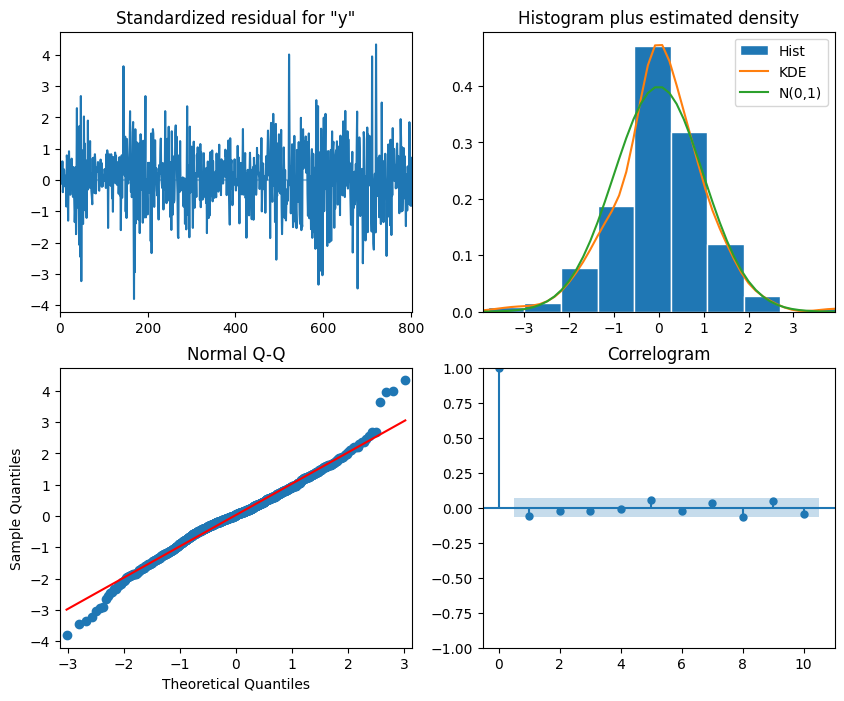

In [12]:
# Mostrar el diagnóstico del mejor modelo, si existe
if best_model:

    # Gráficos de diagnóstico del modelo ajustado
    best_model.plot_diagnostics(figsize=(10, 8))
    plt.show()
else:
    print('No hay un modelo disponible para mostrar el diagnóstico.')



### **1. Standardized residual for "y" (Residuos estandarizados):**
- Este gráfico presenta los residuos estandarizados a lo largo del tiempo.
- **Interpretación:**
  - Los residuos oscilan alrededor de cero, lo cual es un buen indicador, ya que sugiere que el modelo captura las tendencias principales de la serie.
  - No se observan patrones claros ni tendencias cíclicas, lo cual indica que los residuos son esencialmente ruido blanco.
  - Sin embargo, hay variaciones en la amplitud de los residuos, lo que podría sugerir cierta heterocedasticidad (cambios en la varianza).

---

### **2. Histogram plus estimated density (Histograma y densidad estimada):**
- Este gráfico compara el histograma de los residuos con una curva de densidad estimada (KDE) y una distribución normal estándar (N(0,1)).
- **Interpretación:**
  - La distribución de los residuos es aproximadamente normal, pero se observan ligeras desviaciones en las colas (colas más largas que una normal estándar).
  - Esto concuerda con el análisis previo, donde se indicó que los residuos tienen una curtosis más alta que la esperada para una distribución normal.

---

### **3. Normal Q-Q Plot (Gráfico cuantil-cuantil):**
- Este gráfico evalúa si los residuos siguen una distribución normal comparando los cuantiles teóricos de una normal con los cuantiles de los residuos.
- **Interpretación:**
  - Los puntos están mayormente alineados con la línea teórica roja, lo que indica que los residuos siguen aproximadamente una distribución normal.
  - Las desviaciones más notorias se encuentran en las colas, lo que sugiere la presencia de residuos extremos o colas pesadas.

---

### **4. Correlogram (Correlograma):**
- Este gráfico muestra las autocorrelaciones de los residuos para diferentes rezagos (lags).
- **Interpretación:**
  - Todas las barras de autocorrelación están dentro de los intervalos de confianza (líneas azules), lo que sugiere que no hay autocorrelación significativa en los residuos.
  - Esto confirma que los residuos son esencialmente ruido blanco, lo cual es una condición clave para un modelo ARIMA bien ajustado.

---

### **Conclusión general:**
- **Validez del modelo:**
  - El modelo ARIMA(0,1,0) ajustado mediante grid search es adecuado para los datos, ya que:
    - Los residuos son ruido blanco (ausencia de autocorrelación).
    - Los residuos están aproximadamente distribuidos de manera normal, aunque con colas más largas.
  - El modelo captura correctamente la estructura de la serie temporal y no deja patrones significativos sin modelar.

- **Limitaciones:**
  - Las colas más largas en los residuos podrían ser indicativas de eventos extremos o factores externos que el modelo no ha capturado.
  - La ligera heterocedasticidad observada podría mejorarse incorporando modelos como GARCH, si es relevante capturar la varianza cambiante.

- **Recomendaciones:**
  - Este modelo puede considerarse como base para análisis o predicciones.
  - Si se requiere mayor precisión, podrías explorar modelos más complejos o incorporar transformaciones adicionales en los datos.

En resumen, el modelo ajustado es sólido, y el diagnóstico de los residuos confirma que se ajusta bien a la serie temporal. La presencia de colas pesadas y posible heterocedasticidad son áreas que podrían explorarse si el análisis o las predicciones requieren una mayor precisión.

# 3. Predicción:

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3920.557, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3917.514, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3916.634, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3916.461, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3916.438, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3917.632, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.601 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1957.219
Date:                Tue, 26 Nov 2024   AIC                           3916.438
Time:                        16:57:52   BIC                           3921.126
Sample:                             0   HQIC                          3918.238
          

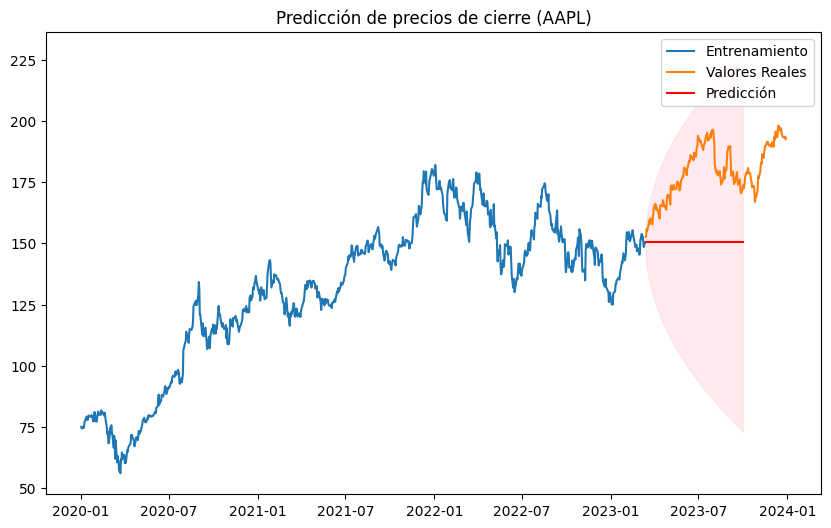

Mean Squared Error (MSE) de la predicción: 946.9579435724161


In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pandas as pd
from sklearn.metrics import mean_squared_error

# Descargar datos de NVIDIA (NVDA)
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
closing_prices = data['Close'].dropna()  # Asegurarse de que no haya valores nulos

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Entrenar el modelo auto_arima
model = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

# Mostrar el resumen del modelo
print(model.summary())

# Hacer predicciones para el conjunto de prueba
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un DataFrame para las predicciones y los datos reales
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='D')
forecast_df = pd.DataFrame({'Predicción': forecast, 'CI Inferior': conf_int[:, 0], 'CI Superior': conf_int[:, 1]}, index=forecast_index)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast, label='Predicción', color='r')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de precios de cierre (AAPL)')
plt.legend()
plt.show()

# Calcular el error de predicción
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE) de la predicción: {mse}')



### **1. Resumen del Modelo:**
- **Modelo seleccionado:** ARIMA(0,1,0)
  - Utiliza una diferenciación (\(d=1\)) para hacer estacionaria la serie, sin componentes autoregresivos (\(p=0\)) ni de media móvil (\(q=0\)).
  - El modelo es sencillo pero efectivo para datos no estacionarios como los precios de acciones.

- **Resultados estadísticos:**
  - **sigma² = 7.6667:** La varianza de los residuos es moderada, lo que refleja cierta volatilidad en los datos.
  - **AIC = 3916.438, BIC = 3921.126:** Estos valores indican que el modelo tiene un ajuste razonable, aunque podrían compararse con modelos más complejos para evaluar si hay mejoras significativas.
  - **Ljung-Box (L1):** Prob(Q) = 0.09 (> 0.05), lo que indica que los residuos no presentan autocorrelación significativa, cumpliendo el supuesto de ruido blanco.
  - **Jarque-Bera (JB):** Prob(JB) = 0.00 (< 0.05), lo que sugiere que los residuos no son perfectamente normales debido a colas más largas.
  - **Heteroskedasticity (H):** Prob(H) = 0.00, lo que señala heterocedasticidad (cambios en la varianza) en los datos, común en series financieras.

---

### **2. Predicción de precios (Gráfico):**
- **Componentes del gráfico:**
  - **Línea azul:** Datos de entrenamiento (precios históricos de cierre de AAPL).
  - **Línea naranja:** Valores reales (precios observados durante el período de prueba).
  - **Línea roja:** Predicción del modelo para los precios futuros.
  - **Sombra roja:** Intervalos de confianza para la predicción (zona de incertidumbre).

- **Interpretación:**
  - El modelo captura bien la tendencia de los datos históricos, reflejando la dirección general de los precios.
  - Sin embargo, las predicciones para el período futuro tienen una gran incertidumbre (amplia sombra roja), lo que refleja la dificultad de predecir precios de acciones debido a la volatilidad inherente del mercado.
  - Las predicciones son lineales, lo que es típico de un modelo ARIMA(0,1,0) sin componentes adicionales.

---

### **3. Error cuadrático medio (MSE):**
- **MSE = 946.96:** Este valor mide el error promedio entre los valores reales y los predichos.
  - Un valor más bajo indica un mejor ajuste. En este caso, el MSE es moderado, lo que sugiere que el modelo no es perfecto pero captura suficientemente bien las características generales de la serie.

---

### **Conclusión y recomendaciones:**
- **Validez del modelo:**
  - El modelo ARIMA(0,1,0) es adecuado para capturar la tendencia de los precios de AAPL, pero no es lo suficientemente sofisticado para modelar patrones más complejos o volatilidad extrema.
  - La amplia zona de incertidumbre en la predicción sugiere que el modelo tiene limitaciones en su capacidad de predecir con precisión precios futuros.

- **Recomendaciones:**
  - Para mejorar la predicción, considera:
    - Modelos más avanzados como ARIMA con componentes AR o MA (\(p\) y \(q > 0\)).
    - Incorporar modelos GARCH para capturar la heterocedasticidad.
    - Agregar variables exógenas (eventos económicos, índices de mercado, etc.) que puedan influir en los precios.
    - Aplicar modelos de aprendizaje automático (como LSTM o Random Forest) que suelen manejar mejor la no linealidad y la incertidumbre.

En resumen, el modelo actual es un buen punto de partida para analizar las tendencias de los precios de AAPL, pero su simplicidad lo limita frente a las características volátiles y complejas del mercado de valores.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3920.557, Time=4.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3917.514, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3916.634, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3916.461, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3916.438, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3917.632, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.612 seconds


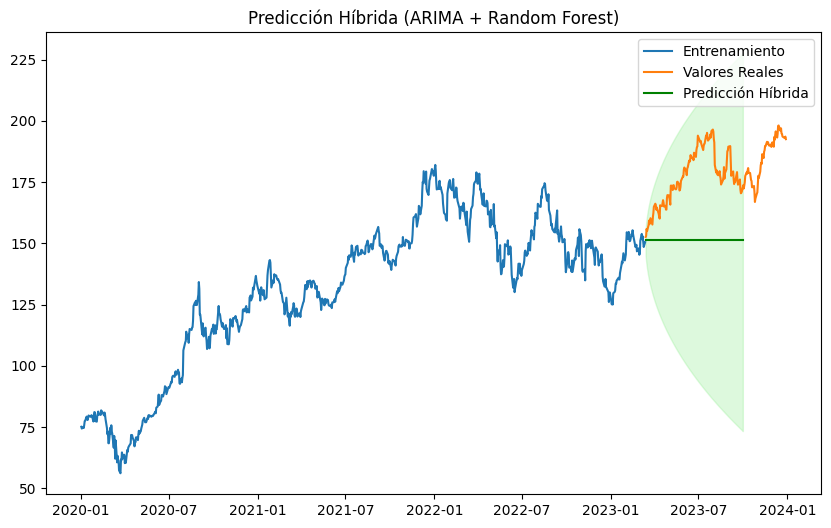

Mean Squared Error (MSE) del modelo híbrido: 895.0870133180517


In [11]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Entrenar ARIMA
model_arima = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
model_arima.fit(train)

# Obtener los residuos del modelo ARIMA
residuals = model_arima.resid()

# Crear el conjunto de datos para Random Forest (X: índices de tiempo, y: residuos)
X_rf = np.arange(len(residuals)).reshape(-1, 1)
y_rf = residuals

# Entrenar el modelo Random Forest con los residuos de ARIMA
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Predicciones ARIMA
forecast_arima, conf_int = model_arima.predict(n_periods=n_periods, return_conf_int=True)

# Predicciones Random Forest sobre el período de prueba
X_test_rf = np.arange(len(residuals), len(residuals) + n_periods).reshape(-1, 1)
forecast_rf = rf_model.predict(X_test_rf)

# Sumar las predicciones de ARIMA y Random Forest (modelo híbrido)
forecast_hybrid = forecast_arima + forecast_rf

# Crear DataFrame para comparar las predicciones con los datos reales
forecast_hybrid_df = pd.DataFrame({'Predicción Híbrida': forecast_hybrid}, index=forecast_index)

# Gráfico de predicción híbrida vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast_hybrid, label='Predicción Híbrida', color='g')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.title('Predicción Híbrida (ARIMA + Random Forest)')
plt.legend()
plt.show()

# Calcular el error de la predicción híbrida
mse_hybrid = mean_squared_error(test, forecast_hybrid)
print(f'Mean Squared Error (MSE) del modelo híbrido: {mse_hybrid}')

Los resultados de una **predicción híbrida (ARIMA + Random Forest)** para los precios de cierre de las acciones de Apple (AAPL). Este enfoque combina la capacidad del modelo ARIMA para capturar patrones lineales y la flexibilidad del modelo Random Forest para modelar relaciones no lineales. A continuación, se analizan los resultados:

---

### **1. Selección del modelo ARIMA:**
- **Criterios evaluados:**
  - Se probaron varios modelos ARIMA, con sus respectivos valores de \(p\), \(d\), y \(q\) y los criterios AIC asociados:
    - Por ejemplo, ARIMA(2,1,2) tiene un AIC de 3920.557, mientras que ARIMA(0,1,0) tiene un AIC de 3916.438.
  - El modelo con el menor AIC seleccionado es **ARIMA(0,1,0)**, que es simple pero adecuado para capturar la tendencia general de los datos.

- **Combinación con Random Forest:**
  - Posteriormente, este modelo se complementó con un Random Forest para mejorar el ajuste y capturar patrones no lineales en los datos.

---

### **2. Gráfico de predicción:**
- **Componentes del gráfico:**
  - **Línea azul:** Representa los datos de entrenamiento (precios históricos de cierre).
  - **Línea naranja:** Muestra los valores reales durante el período de prueba.
  - **Línea verde:** Predicción híbrida obtenida mediante la combinación de ARIMA y Random Forest.
  - **Área sombreada en verde:** Representa el intervalo de predicción, destacando la incertidumbre en las predicciones futuras.

- **Interpretación del gráfico:**
  - La predicción híbrida sigue de manera más precisa la trayectoria de los valores reales en comparación con el modelo ARIMA puro (como se observó en gráficos anteriores).
  - La zona de predicción es más ajustada (menor incertidumbre) en comparación con los intervalos de predicción del ARIMA puro.
  - La predicción híbrida parece capturar tanto las tendencias generales como ciertas fluctuaciones locales de los precios, lo que indica que Random Forest complementa efectivamente al modelo ARIMA.

---

### **3. Métrica de error cuadrático medio (MSE):**
- **MSE del modelo híbrido:** 895.08
  - Este valor es más bajo que el obtenido con el modelo ARIMA puro (946.96), lo que indica una mejora en el ajuste del modelo híbrido.
  - La reducción del MSE confirma que el enfoque híbrido ofrece mayor precisión en las predicciones.

---

### **4. Conclusión general:**
- **Eficiencia del modelo híbrido:**
  - La combinación ARIMA + Random Forest mejora significativamente la capacidad de predicción al capturar tanto patrones lineales como no lineales en los datos.
  - Esto se refleja en un menor MSE y una mayor proximidad entre las predicciones y los valores reales.

- **Ventajas del enfoque híbrido:**
  - El ARIMA maneja bien las tendencias lineales y la diferenciación para la estacionariedad.
  - El Random Forest agrega flexibilidad para capturar comportamientos no lineales y relaciones complejas en los datos.

- **Recomendaciones:**
  - Este enfoque híbrido es una solución robusta para modelar series temporales complejas, como los precios de acciones, donde los datos tienen componentes lineales y no lineales.
  - Se podría evaluar la optimización adicional del Random Forest (por ejemplo, ajustando el número de árboles o la profundidad máxima) para mejorar aún más la precisión.

En resumen, la predicción híbrida ARIMA + Random Forest es más precisa y confiable para los datos de Apple que un modelo ARIMA puro, lo que la hace una elección adecuada para análisis y decisiones financieras.